# Importando bibliotecas

In [1]:
#importando as bibliotecas
import yfinance as yf
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.graph_objs as go

from scipy.stats import norm, t

import vectorbt as vbt
from datetime import datetime

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

# Criando funções globais

In [115]:
#funcao para calcular o retorno do ativo e retornar um pivot
def pfun_pivot_calcular_retorno(filter_asset, df, tipo_pivot = 1, tipo_retorno = 'M'):
    
    if tipo_retorno == 'D':
        df_aux = df[filter_asset].pct_change().dropna().to_frame()
    else:
        df_aux = df[filter_asset].resample(tipo_retorno, kind='period').last().pct_change().dropna().to_frame()
    
    #alterando nome de uma coluna especifica
    df_aux.rename(columns = {filter_asset:'return'}, inplace = True)
    
    if tipo_pivot == 1:
        print(f'{tipo_retorno} >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> {filter_asset}')      
        return(df_aux)
    
    else:
        print(f'RETORNANDO DF PIVOT!')
        
        if tipo_retorno == 'M':
            print(f'DF PIVOT MENSAL >>>>> {filter_asset}')
            #criando colunas month e year para obter os dados de mês e ano
            df_aux['month'] = df_aux.index.month
            df_aux['year'] = df_aux.index.year
        
            #convertendo df para pivot com ano e mes
            df_pivot = df_aux.pivot(values='return', columns='month', index='year')
            
        elif tipo_retorno == 'Q':
            print(f'DF PIVOT TRIMESTRAL >>>>> {filter_asset}')
            #criando colunas month e year para obter os dados de mês e ano
            df_aux['quarter'] = df_aux.index.quarter
            df_aux['year'] = df_aux.index.year
        
            #convertendo df para pivot com ano e trimestre
            df_pivot = df_aux.pivot(values='return', columns='quarter', index='year')
        
        else:
            print('TIPO DE RETORNO INVALIDO!!!')
            df_pivot = None
        
        return(df_pivot)

In [138]:
#funcao para retornar o acumulado
def pfun_calcular_retorno(df_aux):
  df = df_aux.copy()  
  df['daily_return'] = df.iloc[:,0].pct_change()
  df['acum_return'] = (1 +  df['daily_return']).cumprod()
  df['daily_return'].iloc[0] = 0
  df['acum_return'].iloc[0] = 1
  df.rename(columns={df.columns[0]: 'price'}, inplace=True)

  return df

# Verificando estrutura do data frame

In [2]:
carteira_teorica = 'ibov'
url = f'../result/db_matriz_preco_ct_b3_{carteira_teorica}.csv'

In [3]:
df = pd.read_csv(url, index_col=0)

In [4]:
#verificando estrutura da tabela (linhas x colunas)
df.shape

(5680, 76)

In [5]:
#verificando nome das colunas
df.columns

Index(['alpa4.sa', 'abev3.sa', 'amer3.sa', 'b3sa3.sa', 'bpan4.sa', 'bbse3.sa',
       'brml3.sa', 'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa',
       'brfs3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'ecor3.sa',
       'elet3.sa', 'elet6.sa', 'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa',
       'egie3.sa', 'eqtl3.sa', 'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa',
       'goll4.sa', 'hype3.sa', 'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'jhsf3.sa',
       'klbn11.sa', 'rent3.sa', 'lren3.sa', 'mglu3.sa', 'mrfg3.sa', 'beef3.sa',
       'mrve3.sa', 'mult3.sa', 'pcar3.sa', 'petr3.sa', 'petr4.sa', 'prio3.sa',
       'posi3.sa', 'qual3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa', 'sanb11.sa',
       'csna3.sa', 'slce3.sa', 'sula11.sa', 'suzb3.sa', 'taee11.sa',
       'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa', 'vale3.sa',
       'viia3.sa', 'wege3.sa', 'yduq3.sa', 'DATE_UPDATE', '

In [6]:
#excluindo colunas
df.drop(['DATE_UPDATE', 'CARTEIRA_TEORICA'], axis=1, inplace=True)

In [7]:
#confirmando as colunas excluidas
df.columns

Index(['alpa4.sa', 'abev3.sa', 'amer3.sa', 'b3sa3.sa', 'bpan4.sa', 'bbse3.sa',
       'brml3.sa', 'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa',
       'brfs3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'ecor3.sa',
       'elet3.sa', 'elet6.sa', 'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa',
       'egie3.sa', 'eqtl3.sa', 'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa',
       'goll4.sa', 'hype3.sa', 'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'jhsf3.sa',
       'klbn11.sa', 'rent3.sa', 'lren3.sa', 'mglu3.sa', 'mrfg3.sa', 'beef3.sa',
       'mrve3.sa', 'mult3.sa', 'pcar3.sa', 'petr3.sa', 'petr4.sa', 'prio3.sa',
       'posi3.sa', 'qual3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa', 'sanb11.sa',
       'csna3.sa', 'slce3.sa', 'sula11.sa', 'suzb3.sa', 'taee11.sa',
       'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa', 'vale3.sa',
       'viia3.sa', 'wege3.sa', 'yduq3.sa'],
      dtype='ob

In [8]:
#verificando tipo do index
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29', '2022-08-01',
       '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08'],
      dtype='object', name='date', length=5680)

In [9]:
#convertendo index para data
df.index = pd.to_datetime(df.index)

In [10]:
#confirmando tipo do index
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08'],
              dtype='datetime64[ns]', name='date', length=5680, freq=None)

In [11]:
df

alpa4.sa   abev3.sa  amer3.sa  b3sa3.sa  bpan4.sa   bbse3.sa  \
date                                                                        
2000-01-03        NaN        NaN       NaN       NaN       NaN        NaN   
2000-01-04        NaN        NaN       NaN       NaN       NaN        NaN   
2000-01-05        NaN   0.321626       NaN       NaN       NaN        NaN   
2000-01-06        NaN   0.305322       NaN       NaN       NaN        NaN   
2000-01-07        NaN   0.305322       NaN       NaN       NaN        NaN   
...               ...        ...       ...       ...       ...        ...   
2022-08-02  20.799999  14.710000     13.76     10.80      6.59  29.250000   
2022-08-03  21.290001  14.630000     14.74     11.16      6.79  28.559999   
2022-08-04  22.379999  14.680000     15.08     11.90      7.26  28.209999   
2022-08-05  19.350000  14.600000     13.90     12.07      7.39  28.480000   
2022-08-08  19.290001  14.800000     14.24     12.45      7.28  29.490000   

            brml3.sa   bbdc3.sa   bbdc4.sa   brap4.sa  ...  taee11.sa  \
date                                                   ...              
2000-01-03       NaN   1.196446        NaN   1.517180  ...        NaN   
2000-01-04       NaN   1.109432        NaN   1.408810  ...        NaN   
2000-01-05       NaN   1.147137        NaN   1.517180  ...        NaN   
2000-01-06       NaN   1.164540        NaN   1.517180  ...        NaN   
2000-01-07       NaN   1.184844        NaN   1.517180  ...        NaN   
...              ...        ...        ...        ...  ...        ...   
2022-08-02      8.02  14.640000  17.670000  22.450001  ...      41.27   
2022-08-03      8.17  14.820000  17.950001  21.799999  ...      41.27   
2022-08-04      8.65  15.180000  18.280001  22.110001  ...      41.82   
2022-08-05      8.65  15.320000  18.500000  22.440001  ...      42.16   
2022-08-08      8.68  15.360000  18.559999  22.440001  ...      42.59   

             vivt3.sa  tims3.sa   tots3.sa  ugpa3.sa  usim5.sa   vale3.sa  \
date                                                                        
2000-01-03   7.796522       NaN        NaN       NaN  1.582737   1.795995   
2000-01-04   7.585367       NaN        NaN       NaN  1.525033   1.753233   
2000-01-05   7.669828       NaN        NaN       NaN  1.670117   1.753233   
2000-01-06   7.838754       NaN        NaN       NaN  1.821796   1.753233   
2000-01-07   7.877735       NaN        NaN       NaN  1.894338   1.817375   
...               ...       ...        ...       ...       ...        ...   
2022-08-02  44.310001     12.29  26.314312     12.99  8.440000  70.250000   
2022-08-03  44.599998     12.20  27.071558     13.46  8.440000  67.519997   
2022-08-04  45.259998     12.50  27.500000     13.42  8.920000  67.129997   
2022-08-05  45.450001     12.67  26.959999     13.30  8.760000  68.000000   
2022-08-08  45.720001     12.68  28.219999     13.50  8.790000  68.580002   

            viia3.sa   wege3.sa  yduq3.sa  
date                                       
2000-01-03  0.996683   0.124200       NaN  
2000-01-04  0.996683   0.119841       NaN  
2000-01-05  0.996683   0.119841       NaN  
2000-01-06  0.996683   0.108946       NaN  
2000-01-07  0.996683   0.108946       NaN  
...              ...        ...       ...  
2022-08-02  2.350000  28.379999     13.16  
2022-08-03  2.620000  28.120001     14.28  
2022-08-04  2.950000  28.809999     14.88  
2022-08-05  2.860000  28.830000     14.99  
2022-08-08  2.920000  29.730000     15.45  

[5680 rows x 74 columns]

# Selecionando o ativo para estudo

In [172]:
filter_asset = 'abev3.sa'

## Calculando o retorno mensal do ativo

In [80]:
#selecionando apenas uma acao
#calculando o retorno mensal
df_retorno_mensal = pfun_pivot_calcular_retorno(filter_asset, df)

M >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> abev3.sa


In [81]:
#verificando as últimas linhas dos df
df_retorno_mensal.tail()

return
date             
2022-04 -0.057143
2022-05 -0.022727
2022-06 -0.055673
2022-07  0.114179
2022-08 -0.008707

In [82]:
#convertendo df para pivot com ano e mes
df_pivot_mensal = pfun_pivot_calcular_retorno(filter_asset, df, 2)

RETORNANDO DF PIVOT!
DF PIVOT MENSAL >>>>> abev3.sa


In [83]:
df_pivot_mensal

month        1         2         3         4         5         6         7   \
year                                                                          
2000        NaN -0.065850  0.295825  0.032605 -0.031575  0.249973  0.217417   
2001   0.106386 -0.057695  0.000000  0.061227 -0.019233  0.011768 -0.050391   
2002  -0.065418  0.000000  0.000000  0.019997 -0.009802 -0.069305  0.005319   
2003  -0.060692 -0.037842  0.099541  0.063155  0.029685 -0.038443  0.000000   
2004   0.022049  0.109400  0.298609  0.101605  0.110681  0.048951 -0.041668   
2005  -0.049707  0.005299 -0.062935 -0.479440  0.013334  0.125697 -0.010000   
2006   0.025931  0.011017  0.048718  0.051345 -0.021047 -0.049767 -0.018763   
2007   0.033394  0.005654  0.095918  0.094041  0.106374  0.057701 -0.040000   
2008  -0.080000  0.113043 -0.089921 -0.044264 -0.054955 -0.081030 -0.127349   
2009  -0.046840  0.043354  0.104893  0.070930  0.092360 -0.020351  0.022634   
2010   0.000000 -0.005800 -0.067491  0.065855  0.001224  0.059063  0.046347   
2011  -0.125115 -0.013695  0.051114  0.087113 -0.024711  0.045720 -0.112072   
2012  -0.047619  0.117692  0.097669  0.071141 -0.071503  0.012552  0.018049   
2013   0.075627 -0.023097 -0.061519 -0.001465  0.003056  0.010116  0.037524   
2014  -0.062519  0.049099  0.004147 -0.033703 -0.028186 -0.006305  0.004140   
2015   0.162043  0.035048  0.014270  0.025433 -0.022163  0.030364  0.025277   
2016   0.045378 -0.048030  0.065760  0.031383 -0.014440 -0.003140 -0.006465   
2017   0.053032  0.037209  0.022421  0.001097  0.024644 -0.012718  0.045876   
2018   0.031485  0.005484  0.094091 -0.030744 -0.156022 -0.078974  0.079533   
2019   0.138492 -0.015991 -0.023215  0.097445 -0.049811  0.019373  0.125210   
2020  -0.043921 -0.185434 -0.180193 -0.048658  0.100529  0.133013 -0.016973   
2021  -0.029903 -0.072138  0.090585 -0.022891  0.201473 -0.049025 -0.025190   
2022  -0.029183  0.015364  0.013158 -0.057143 -0.022727 -0.055673  0.114179   

month        8         9         10        11        12  
year                                                     
2000   0.017856  0.094726  0.217954  0.013158  0.220777  
2001  -0.075511 -0.205296  0.083359  0.038436  0.056789  
2002   0.031743 -0.015384  0.221355  0.028784 -0.009323  
2003   0.120000  0.071411 -0.083319  0.134546  0.017627  
2004   0.035653  0.024350  0.127048 -0.013091  0.008106  
2005   0.021885  0.103789 -0.052238  0.163780  0.017591  
2006   0.076460  0.039040 -0.035341  0.069093  0.041425  
2007   0.022727 -0.029630  0.083970 -0.088029 -0.031719  
2008   0.060241  0.053974 -0.129074  0.010640  0.050161  
2009   0.123907  0.056539  0.060078  0.066294  0.059918  
2010   0.023096  0.045239  0.116936  0.029861  0.091851  
2011   0.203704  0.010769  0.010242  0.069888  0.100807  
2012  -0.008242 -0.000157  0.079902  0.137628  0.088954  
2013  -0.028957  0.021994 -0.014525  0.052127 -0.013668  
2014   0.044671 -0.020159  0.037069  0.021951 -0.028043  
2015  -0.019517  0.025128 -0.016993 -0.023573 -0.034335  
2016   0.020745  0.032829 -0.049949 -0.081414 -0.030681  
2017   0.037076  0.059416 -0.006654 -0.016268  0.050595  
2018  -0.028851 -0.027056 -0.109051  0.035496 -0.072323  
2019  -0.070045  0.028312 -0.097143  0.038550  0.061515  
2020  -0.114388  0.018684 -0.028708  0.147783  0.149056  
2021   0.027644 -0.105263  0.110457 -0.054738 -0.002379  
2022  -0.008707       NaN       NaN       NaN       NaN

### Plotando gráfico do retorno mensal

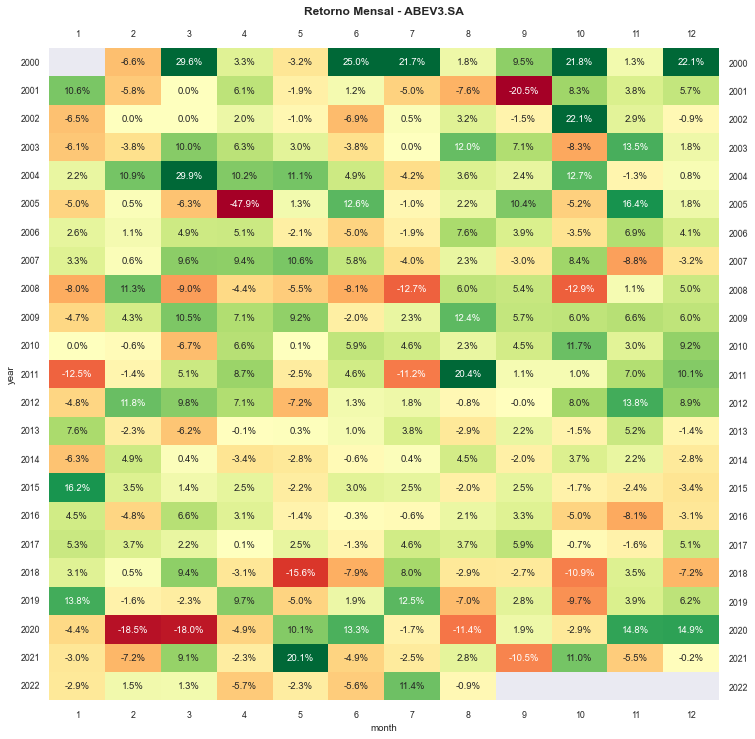

In [84]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

ax = sns.heatmap(df_pivot_mensal, 
                 annot=True, 
                 fmt=".1%", 
                 cmap="RdYlGn", 
                 vmin=-0.2, 
                 vmax=0.2, 
                 center=0, 
                 cbar=False)

ax.set_title(f'Retorno Mensal - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90)
ax.tick_params(axis = "x", labeltop=True)

## Calculando o retorno trimestral do ativo

In [87]:
df_pivot_trimestral = pfun_pivot_calcular_retorno(filter_asset, df, 2, 'Q')

RETORNANDO DF PIVOT!
DF PIVOT TRIMESTRAL >>>>> abev3.sa


In [88]:
df_pivot_trimestral

quarter         1         2         3         4
year                                           
2000          NaN  0.249973  0.356535  0.506414
2001     0.042553  0.053065 -0.302327  0.188887
2002    -0.065418 -0.060000  0.021273  0.244795
2003    -0.006275  0.052631  0.199980  0.058348
2004     0.472443  0.283424  0.016667  0.121311
2005    -0.104795 -0.406193  0.116666  0.122389
2006     0.087766 -0.022004  0.097499  0.074032
2007     0.138919  0.280260 -0.047273 -0.042807
2008    -0.068080 -0.169973 -0.024842 -0.075657
2009     0.098798  0.146034  0.214327  0.198084
2010    -0.072900  0.130189  0.118942  0.255945
2011    -0.092990  0.108724  0.080313  0.189802
2012     0.168435  0.007035  0.009499  0.337809
2013    -0.013860  0.011719  0.029639  0.022674
2014    -0.012411 -0.066860  0.027850  0.030113
2015     0.219934  0.033152  0.030526 -0.073120
2016     0.060610  0.013298  0.047439 -0.154072
2017     0.116703  0.012722  0.149099  0.026627
2018     0.134728 -0.246572  0.020022 -0.144149
2019     0.094278  0.062983  0.076020 -0.004657
2020    -0.361543  0.186242 -0.113154  0.281005
2021    -0.018347  0.116416 -0.103691  0.047176
2022    -0.001297 -0.129870  0.104478       NaN

### Plotando gráfico do retorno trimestral

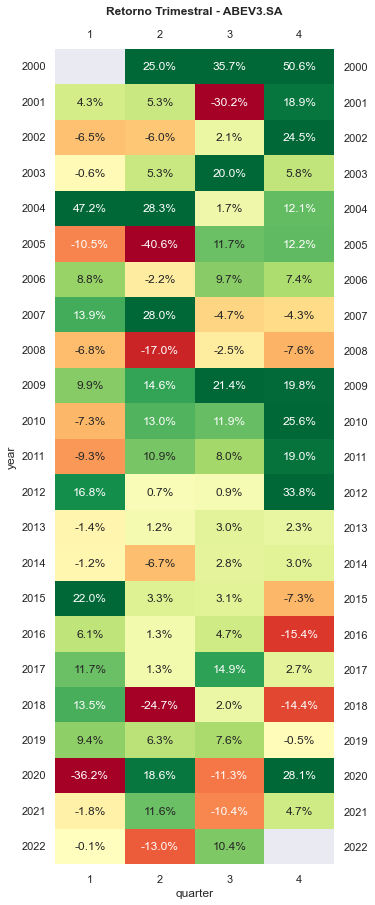

In [90]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

ax = sns.heatmap(df_pivot_trimestral, 
                 annot=True, 
                 fmt=".1%", 
                 cmap="RdYlGn", 
                 vmin=-0.2, 
                 vmax=0.2, 
                 center=0, 
                 cbar=False)

ax.set_title(f'Retorno Trimestral - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

## Calculando o retorno anual do ativo

In [93]:
#calculando o retorno anual
df_retorno_anual = pfun_pivot_calcular_retorno(filter_asset, df, 1, 'A')

A >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> abev3.sa


In [94]:
df_retorno_anual

return
date          
2001 -0.089362
2002  0.116825
2003  0.328448
2004  1.154335
2005 -0.333755
2006  0.253989
2007  0.329717
2008 -0.302765
2009  0.832054
2010  0.472501
2011  0.292586
2012  0.589093
2013  0.050560
2014 -0.024252
2015  0.203879
2016 -0.047741
2017  0.334129
2018 -0.253653
2019  0.245797
2020 -0.139593
2021  0.028636
2022 -0.040208

In [95]:
df_pivot_anual = pd.DataFrame()

for year in range(df_retorno_anual.index.size, 0, -1):
    df_pivot_anual[f"{year}Y"] = df_retorno_anual['return'].rolling(year).mean()

In [96]:
df_pivot_anual

22Y       21Y       20Y       19Y       18Y       17Y       16Y  \
date                                                                         
2001       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2002       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2003       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2006       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2007       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2008       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2009       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2010       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2011       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2013       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2014       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2015       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2016       NaN       NaN       NaN       NaN       NaN       NaN  0.239132   
2017       NaN       NaN       NaN       NaN       NaN  0.244720  0.265600   
2018       NaN       NaN       NaN       NaN  0.217033  0.235056  0.242445   
2019       NaN       NaN       NaN  0.218547  0.235653  0.242642  0.237280   
2020       NaN       NaN  0.200640  0.215903  0.221407  0.215111  0.156409   
2021       NaN  0.192449  0.206539  0.211261  0.204751  0.148893  0.179058   
2022  0.181874  0.194790  0.198688  0.191858  0.138387  0.166160  0.160671   

           15Y       14Y       13Y  ...       10Y        9Y        8Y  \
date                                ...                                 
2001       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2002       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2003       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2004       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2005       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2006       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2007       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2008       NaN       NaN       NaN  ...       NaN       NaN  0.182179   
2009       NaN       NaN       NaN  ...       NaN  0.254388  0.297356   
2010       NaN       NaN       NaN  ...  0.276199  0.316817  0.341816   
2011       NaN       NaN       NaN  ...  0.314394  0.336346  0.337333   
2012       NaN       NaN       NaN  ...  0.361620  0.365306  0.266678   
2013       NaN       NaN  0.284171  ...  0.333832  0.242665  0.314717   
2014       NaN  0.262141  0.289180  ...  0.215973  0.277054  0.279937   
2015  0.258257  0.283087  0.295876  ...  0.269736  0.271486  0.264207   
2016  0.261032  0.271332  0.266939  ...  0.239563  0.229546  0.296085   
2017  0.275519  0.271738  0.203846  ...  0.240004  0.300312  0.233844   
2018  0.236712  0.171167  0.210007  ...  0.244915  0.179678  0.143075   
2019  0.176143  0.212564  0.209377  ...  0.186290  0.154489  0.137226   
2020  0.189087  0.184451  0.173276  ...  0.125080  0.106469  0.046141   
2021  0.174063  0.162945  0.198769  ...  0.098685  0.044196  0.043400   
2022  0.149401  0.181699  0.131672  ...  0.035755  0.034110  0.041406   

            7Y        6Y        5Y        4Y        3Y        2Y        1Y  
date                                                                        
2001       NaN       NaN       NaN       NaN       NaN       NaN -0.089362  
2002       NaN       NaN       NaN       NaN       NaN  0.013732  0.116825  
2003       NaN       NaN       NaN       NaN  0.118637  0.222637  0.328448  


### Plotando gráfico de janela de retorno anual

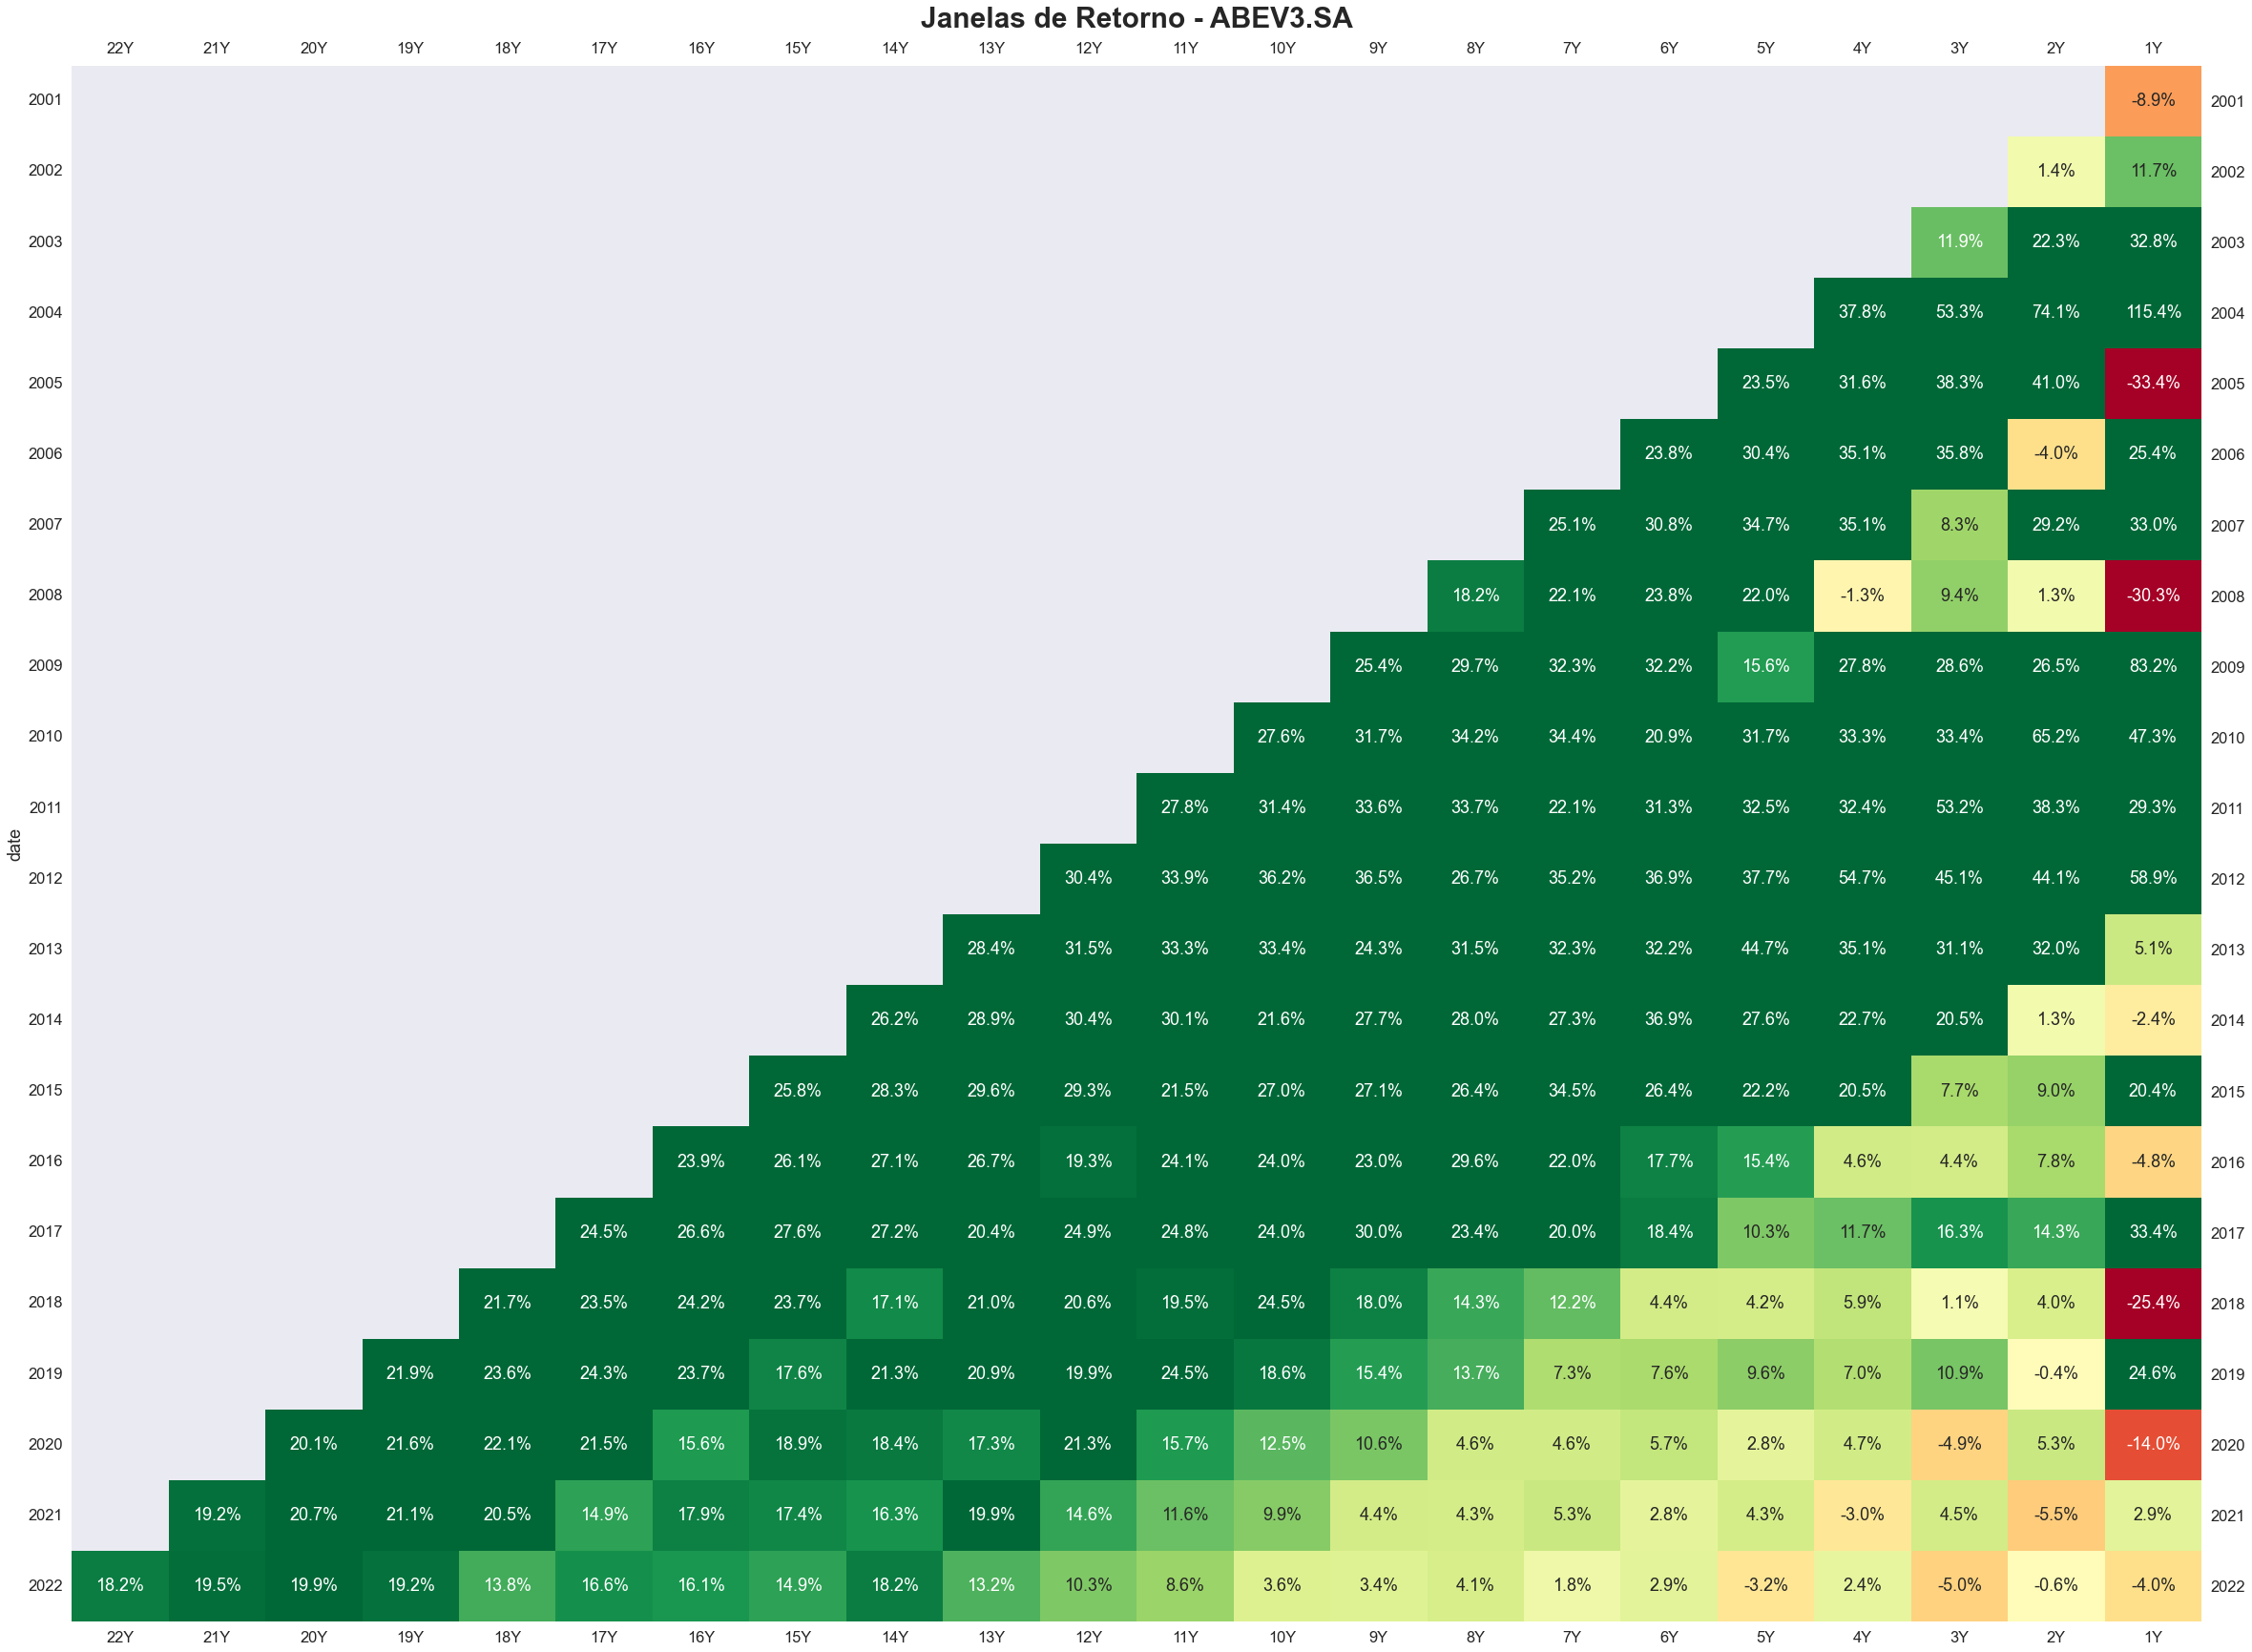

In [97]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.5)

ax = sns.heatmap(df_pivot_anual, 
                 annot=True, 
                 fmt=".1%", 
                 cmap="RdYlGn", 
                 vmin=-0.2, 
                 vmax=0.2, 
                 center=0, 
                 cbar=False)

ax.set_title(f'Janelas de Retorno - {filter_asset.upper()}', pad=15, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

In [98]:
df_pivot_retorno_real = pd.DataFrame()

NUMBER_BASE = 100

for year in range(df_retorno_anual.index.size, 0, -1):
    df_pivot_retorno_real[f"{year}Y"] = NUMBER_BASE * np.exp(year * df_retorno_anual['return'].rolling(year).mean())

In [99]:
df_pivot_retorno_real

22Y          21Y          20Y          19Y          18Y  \
date                                                                    
2001          NaN          NaN          NaN          NaN          NaN   
2002          NaN          NaN          NaN          NaN          NaN   
2003          NaN          NaN          NaN          NaN          NaN   
2004          NaN          NaN          NaN          NaN          NaN   
2005          NaN          NaN          NaN          NaN          NaN   
2006          NaN          NaN          NaN          NaN          NaN   
2007          NaN          NaN          NaN          NaN          NaN   
2008          NaN          NaN          NaN          NaN          NaN   
2009          NaN          NaN          NaN          NaN          NaN   
2010          NaN          NaN          NaN          NaN          NaN   
2011          NaN          NaN          NaN          NaN          NaN   
2012          NaN          NaN          NaN          NaN          NaN   
2013          NaN          NaN          NaN          NaN          NaN   
2014          NaN          NaN          NaN          NaN          NaN   
2015          NaN          NaN          NaN          NaN          NaN   
2016          NaN          NaN          NaN          NaN          NaN   
2017          NaN          NaN          NaN          NaN          NaN   
2018          NaN          NaN          NaN          NaN  4972.899920   
2019          NaN          NaN          NaN  6358.547285  6952.919718   
2020          NaN          NaN  5530.105179  6047.038045  5380.294355   
2021          NaN  5690.752744  6222.702324  5536.589970  3986.568014   
2022  5466.480601  5977.466087  5318.393370  3829.457664  1207.302181   

              17Y          16Y          15Y          14Y          13Y  ...  \
date                                                                   ...   
2001          NaN          NaN          NaN          NaN          NaN  ...   
2002          NaN          NaN          NaN          NaN          NaN  ...   
2003          NaN          NaN          NaN          NaN          NaN  ...   
2004          NaN          NaN          NaN          NaN          NaN  ...   
2005          NaN          NaN          NaN          NaN          NaN  ...   
2006          NaN          NaN          NaN          NaN          NaN  ...   
2007          NaN          NaN          NaN          NaN          NaN  ...   
2008          NaN          NaN          NaN          NaN          NaN  ...   
2009          NaN          NaN          NaN          NaN          NaN  ...   
2010          NaN          NaN          NaN          NaN          NaN  ...   
2011          NaN          NaN          NaN          NaN          NaN  ...   
2012          NaN          NaN          NaN          NaN          NaN  ...   
2013          NaN          NaN          NaN          NaN  4021.448718  ...   
2014          NaN          NaN          NaN  3925.093283  4291.995838  ...   
2015          NaN          NaN  4812.751144  5262.628526  4682.373476  ...   
2016          NaN  4588.381955  5017.286172  4464.082460  3214.319363  ...   
2017  6408.699222  7007.759664  6235.087242  4489.514213  1415.396325  ...   
2018  5437.747390  4838.183814  3483.687422  1098.292185  1533.436028  ...   
2019  6186.293923  4454.381056  1404.319995  1960.712190  1520.924970  ...   
2020  3874.028869  1221.354018  1705.255014  1322.766770   951.237207  ...   
2021  1256.833913  1754.792058  1361.192668   978.870306  1324.994942  ...   
2022  1685.635834  1307.548166   940.293099  1272.776990   553.854817  ...   

              10Y           9Y           8Y           7Y          6Y  \
date                                                                   
2001          NaN          NaN          NaN          NaN         NaN   
2002          NaN          NaN          NaN          NaN         NaN   
2003          NaN          NaN          NaN          NaN         NaN   
2004          NaN          N

### Plotando gráfico de janela de retorno reais por ano

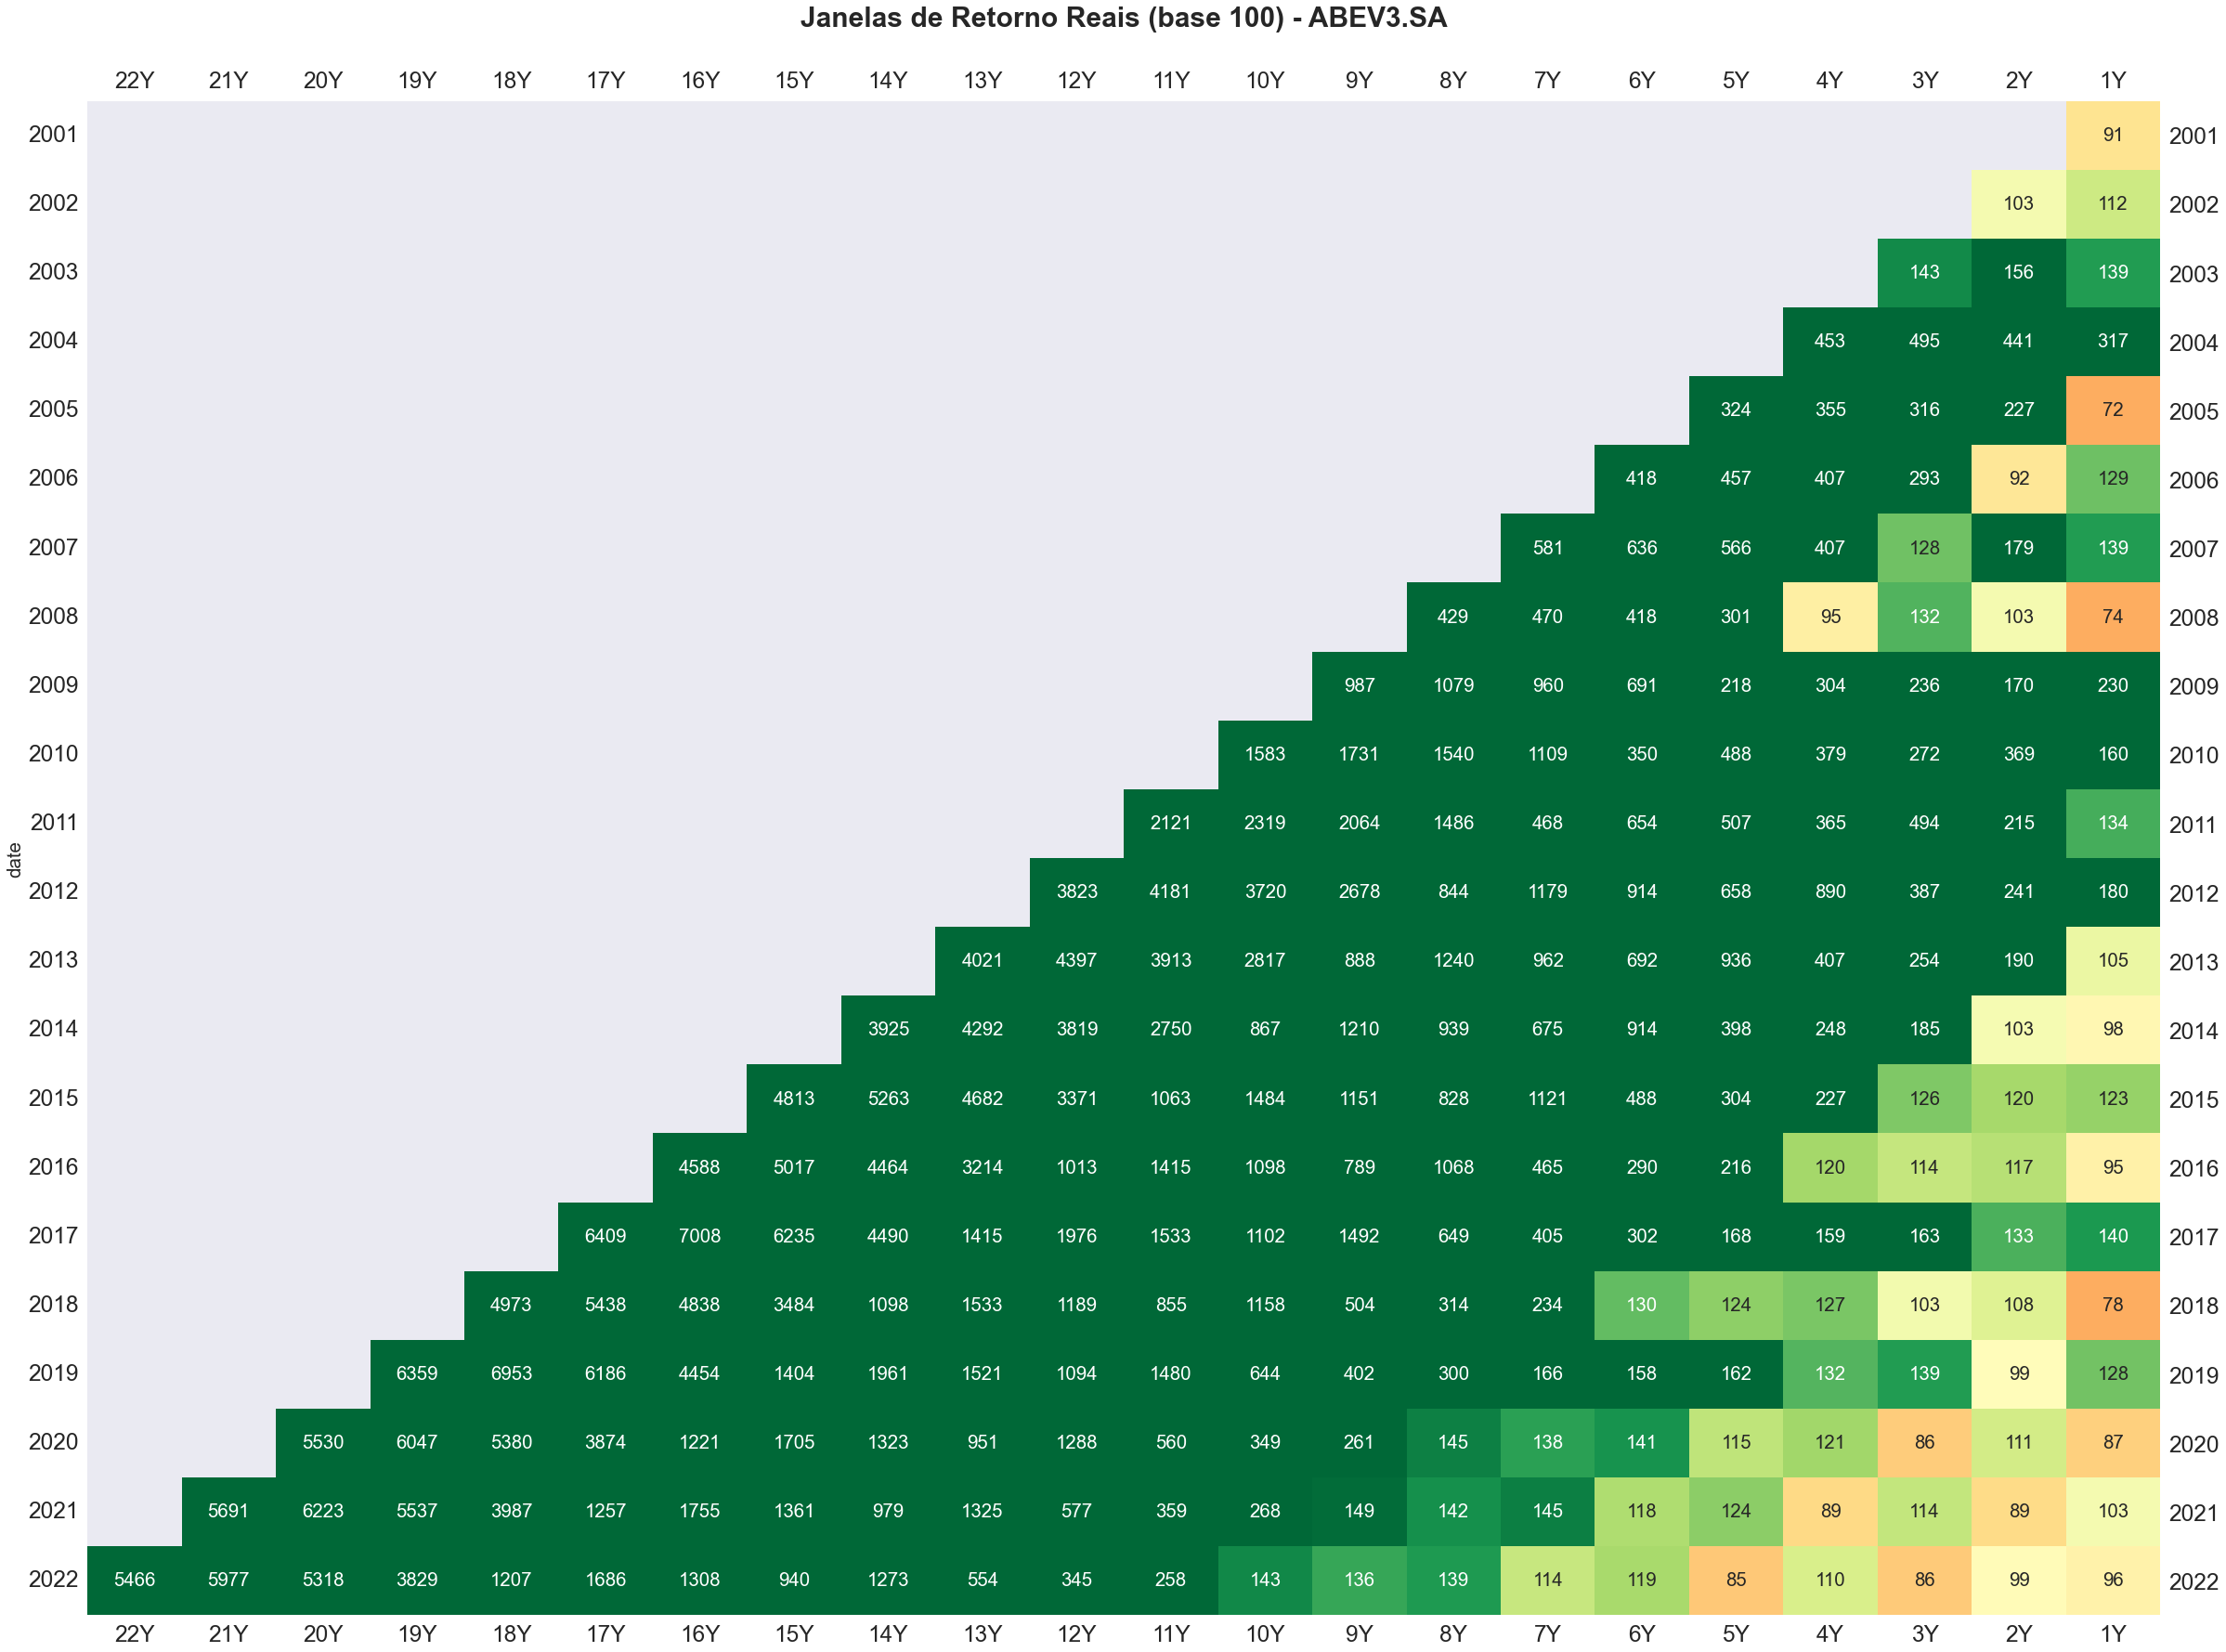

In [100]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.7)

ax = sns.heatmap(df_pivot_retorno_real, 
                 annot=True, 
                 fmt=".0f", 
                 cmap="RdYlGn", 
                 vmin=NUMBER_BASE - 20, 
                 vmax=NUMBER_BASE + 50, 
                 center=NUMBER_BASE, 
                 cbar=False)

ax.set_title(f'Janelas de Retorno Reais (base {NUMBER_BASE}) - {filter_asset.upper()}', pad=80, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large')
ax.tick_params(axis = "x", labeltop=True,  labelsize='large')

### Plotando gráfico da quantidade de retorno negativo x retorno negativo

In [101]:
retorno_neg = df_pivot_retorno_real[df_pivot_retorno_real < NUMBER_BASE].count()
retorno_pos = df_pivot_retorno_real[df_pivot_retorno_real >= NUMBER_BASE].count()

total_de_janelas = df_pivot_retorno_real.count()
pd.concat([-retorno_neg, retorno_pos], 
          axis=1, 
          keys=['retorno_negativo','retorno_positivo']).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

## Obtendo os dividendos do ativo

In [150]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2022-08-13'

In [151]:
data_inicial = '2000-01-01'

In [153]:
#verificando o ativo utilizado
filter_asset

'abev3.sa'

In [154]:
#obtendo os dividendos da empresa
#obtendo os dividendos dos ativos atraves do vectorbt
df_tickers_dividends = vbt.YFData.download(filter_asset, start=data_inicial, end=data_atual).get('Dividends')

D:\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html



In [155]:
#verificando as últimas linhas do df
df_tickers_dividends.tail()

Date
2022-08-08 00:00:00+00:00    0.0
2022-08-09 00:00:00+00:00    0.0
2022-08-10 00:00:00+00:00    0.0
2022-08-11 00:00:00+00:00    0.0
2022-08-12 00:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [156]:
df_ticker = pd.DataFrame(df_tickers_dividends)

In [157]:
df_ticker

Dividends
Date                                
2000-01-05 00:00:00+00:00        0.0
2000-01-06 00:00:00+00:00        0.0
2000-01-07 00:00:00+00:00        0.0
2000-01-10 00:00:00+00:00        0.0
2000-01-11 00:00:00+00:00        0.0
...                              ...
2022-08-08 00:00:00+00:00        0.0
2022-08-09 00:00:00+00:00        0.0
2022-08-10 00:00:00+00:00        0.0
2022-08-11 00:00:00+00:00        0.0
2022-08-12 00:00:00+00:00        0.0

[5681 rows x 1 columns]

In [158]:
#alterando nome de uma coluna especifica
df_ticker.rename(columns = {'Dividends':'dividendos_pagos'}, inplace = True)

In [159]:
df_ticker

dividendos_pagos
Date                                       
2000-01-05 00:00:00+00:00               0.0
2000-01-06 00:00:00+00:00               0.0
2000-01-07 00:00:00+00:00               0.0
2000-01-10 00:00:00+00:00               0.0
2000-01-11 00:00:00+00:00               0.0
...                                     ...
2022-08-08 00:00:00+00:00               0.0
2022-08-09 00:00:00+00:00               0.0
2022-08-10 00:00:00+00:00               0.0
2022-08-11 00:00:00+00:00               0.0
2022-08-12 00:00:00+00:00               0.0

[5681 rows x 1 columns]

In [160]:
df_ticker.index

DatetimeIndex(['2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-10 00:00:00+00:00',
               '2000-01-11 00:00:00+00:00', '2000-01-12 00:00:00+00:00',
               '2000-01-13 00:00:00+00:00', '2000-01-14 00:00:00+00:00',
               '2000-01-17 00:00:00+00:00', '2000-01-18 00:00:00+00:00',
               ...
               '2022-08-01 00:00:00+00:00', '2022-08-02 00:00:00+00:00',
               '2022-08-03 00:00:00+00:00', '2022-08-04 00:00:00+00:00',
               '2022-08-05 00:00:00+00:00', '2022-08-08 00:00:00+00:00',
               '2022-08-09 00:00:00+00:00', '2022-08-10 00:00:00+00:00',
               '2022-08-11 00:00:00+00:00', '2022-08-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5681, freq=None)

In [161]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
df_total_dividends = df_ticker.sum()
df_total_dividends

dividendos_pagos    6.835001
dtype: float64

In [162]:
df_ticker['month'] = df_ticker.index.month
df_ticker['quarter'] = df_ticker.index.quarter
df_ticker['year'] = df_ticker.index.year

In [163]:
df_ticker

dividendos_pagos  month  quarter  year
Date                                                             
2000-01-05 00:00:00+00:00               0.0      1        1  2000
2000-01-06 00:00:00+00:00               0.0      1        1  2000
2000-01-07 00:00:00+00:00               0.0      1        1  2000
2000-01-10 00:00:00+00:00               0.0      1        1  2000
2000-01-11 00:00:00+00:00               0.0      1        1  2000
...                                     ...    ...      ...   ...
2022-08-08 00:00:00+00:00               0.0      8        3  2022
2022-08-09 00:00:00+00:00               0.0      8        3  2022
2022-08-10 00:00:00+00:00               0.0      8        3  2022
2022-08-11 00:00:00+00:00               0.0      8        3  2022
2022-08-12 00:00:00+00:00               0.0      8        3  2022

[5681 rows x 4 columns]

In [164]:
#convertendo df para ano e mes
df_dividendo_mensal = pd.pivot_table(df_ticker, values='dividendos_pagos', index='year', columns='month', aggfunc='sum')
df_dividendo_mensal

month        1         2         3         4    5         6         7    8   \
year                                                                          
2000   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2001   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2002   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2003   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2004   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2005   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2006   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2007   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2008   0.000000  0.000000  0.000000  0.013585  0.0  0.000000  0.046348  0.0   
2009   0.013245  0.000000  0.000000  0.016382  0.0  0.000000  0.031165  0.0   
2010   0.000000  0.000000  0.043951  0.000000  0.0  0.000000  0.000000  0.0   
2011   0.000000  0.000000  0.111874  0.000000  0.0  0.000000  0.085741  0.0   
2012   0.000000  0.000000  0.150496  0.000000  0.0  0.042796  0.000000  0.0   
2013   0.000000  0.127188  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2014   0.153986  0.000000  0.000000  0.059994  0.0  0.000000  0.160000  0.0   
2015   1.090000  0.000000  0.090000  0.000000  0.0  0.100000  0.000000  0.0   
2016   0.000000  0.130000  0.000000  0.000000  0.0  0.000000  0.130000  0.0   
2017   0.070000  0.000000  0.000000  0.000000  0.0  0.160000  0.000000  0.0   
2018   0.000000  0.070000  0.000000  0.000000  0.0  0.160000  0.000000  0.0   
2019   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2020   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2021   0.076700  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2022   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   

month        9         10    11        12  
year                                       
2000   0.000000  0.000000  0.00  0.000000  
2001   0.000000  0.000000  0.00  0.000000  
2002   0.000000  0.000000  0.00  0.000000  
2003   0.000000  0.000000  0.00  0.000000  
2004   0.000000  0.000000  0.00  0.000000  
2005   0.000000  0.000000  0.00  0.000000  
2006   0.000000  0.000000  0.00  0.000000  
2007   0.000000  0.000000  0.00  0.016302  
2008   0.037558  0.000000  0.00  0.000000  
2009   0.043951  0.000000  0.00  0.059134  
2010   0.063170  0.000000  0.00  0.010189  
2011   0.000000  0.019986  0.00  0.000000  
2012   0.000000  0.102690  0.00  0.180682  
2013   0.129988  0.000000  0.00  0.000000  
2014   0.000000  0.220000  0.00  0.000000  
2015   0.150000  0.000000  0.00  0.150000  
2016   0.000000  0.000000  0.16  0.220000  
2017   0.000000  0.000000  0.00  0.310000  
2018   0.000000  0.000000  0.00  0.320000  
2019   0.000000  0.000000  0.00  0.490600  
2020   0.000000  0.000000  0.00  0.413700  
2021   0.000000  0.000000  0.00  0.603600  
2022        NaN       NaN   NaN       NaN

### Plotando gráfico da soma dos dividendos mensal

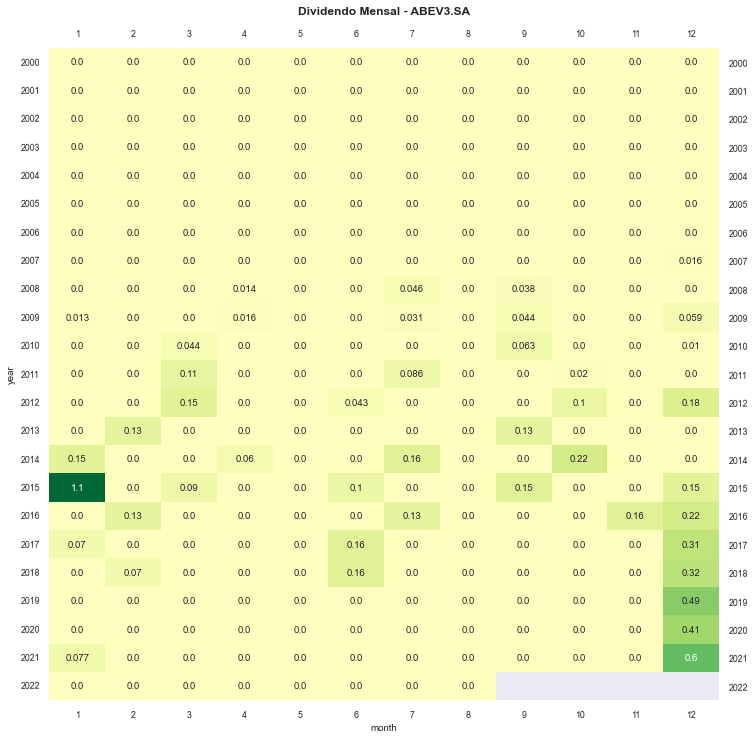

In [166]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

ax = sns.heatmap(df_dividendo_mensal, 
                 annot=True, 
                 fmt=".2", 
                 cmap="RdYlGn", 
                 vmin=0, 
                 vmax=1, 
                 center=0, 
                 cbar=False)

ax.set_title(f'Dividendo Mensal - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=.90)
ax.tick_params(axis = "x", labeltop=True)

In [167]:
#convertendo df para ano e mes
df_dividendo_trimestral = pd.pivot_table(df_ticker, values='dividendos_pagos', index='year', columns='quarter', aggfunc='sum')
df_dividendo_trimestral

quarter         1         2         3         4
year                                           
2000     0.000000  0.000000  0.000000  0.000000
2001     0.000000  0.000000  0.000000  0.000000
2002     0.000000  0.000000  0.000000  0.000000
2003     0.000000  0.000000  0.000000  0.000000
2004     0.000000  0.000000  0.000000  0.000000
2005     0.000000  0.000000  0.000000  0.000000
2006     0.000000  0.000000  0.000000  0.000000
2007     0.000000  0.000000  0.000000  0.016302
2008     0.000000  0.013585  0.083906  0.000000
2009     0.013245  0.016382  0.075116  0.059134
2010     0.043951  0.000000  0.063170  0.010189
2011     0.111874  0.000000  0.085741  0.019986
2012     0.150496  0.042796  0.000000  0.283372
2013     0.127188  0.000000  0.129988  0.000000
2014     0.153986  0.059994  0.160000  0.220000
2015     1.180000  0.100000  0.150000  0.150000
2016     0.130000  0.000000  0.130000  0.380000
2017     0.070000  0.160000  0.000000  0.310000
2018     0.070000  0.160000  0.000000  0.320000
2019     0.000000  0.000000  0.000000  0.490600
2020     0.000000  0.000000  0.000000  0.413700
2021     0.076700  0.000000  0.000000  0.603600
2022     0.000000  0.000000  0.000000       NaN

### Plotando gráfico da soma dos dividendos trimestral

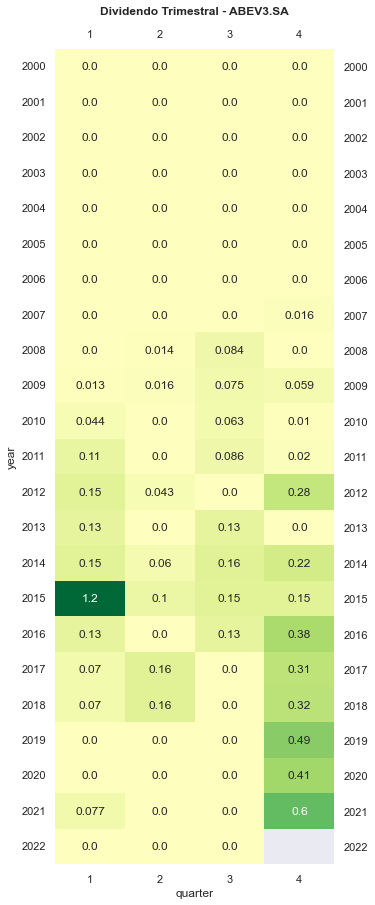

In [168]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

ax = sns.heatmap(df_dividendo_trimestral, 
                 annot=True, 
                 fmt=".2", 
                 cmap="RdYlGn", 
                 vmin=0, 
                 vmax=1, 
                 center=0, 
                 cbar=False)

ax.set_title(f'Dividendo Trimestral - {filter_asset.upper()}', pad=15, fontdict={'fontsize':12, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

In [169]:
df_dividendo_anual = pd.pivot_table(df_ticker, values='dividendos_pagos', index='year', columns=[], aggfunc='sum')
df_dividendo_anual

dividendos_pagos
year                  
2000          0.000000
2001          0.000000
2002          0.000000
2003          0.000000
2004          0.000000
2005          0.000000
2006          0.000000
2007          0.016302
2008          0.097491
2009          0.163877
2010          0.117310
2011          0.217601
2012          0.476664
2013          0.257176
2014          0.593980
2015          1.580000
2016          0.640000
2017          0.540000
2018          0.550000
2019          0.490600
2020          0.413700
2021          0.680300
2022          0.000000

In [170]:
tab_dividendo_anual = pd.DataFrame()

for year in range(df_dividendo_anual.index.size, 0, -1):
    tab_dividendo_anual[f"{year}Y"] = df_dividendo_anual['dividendos_pagos'].rolling(year).sum()

### Plotando gráfico da janela de dividendos por ano

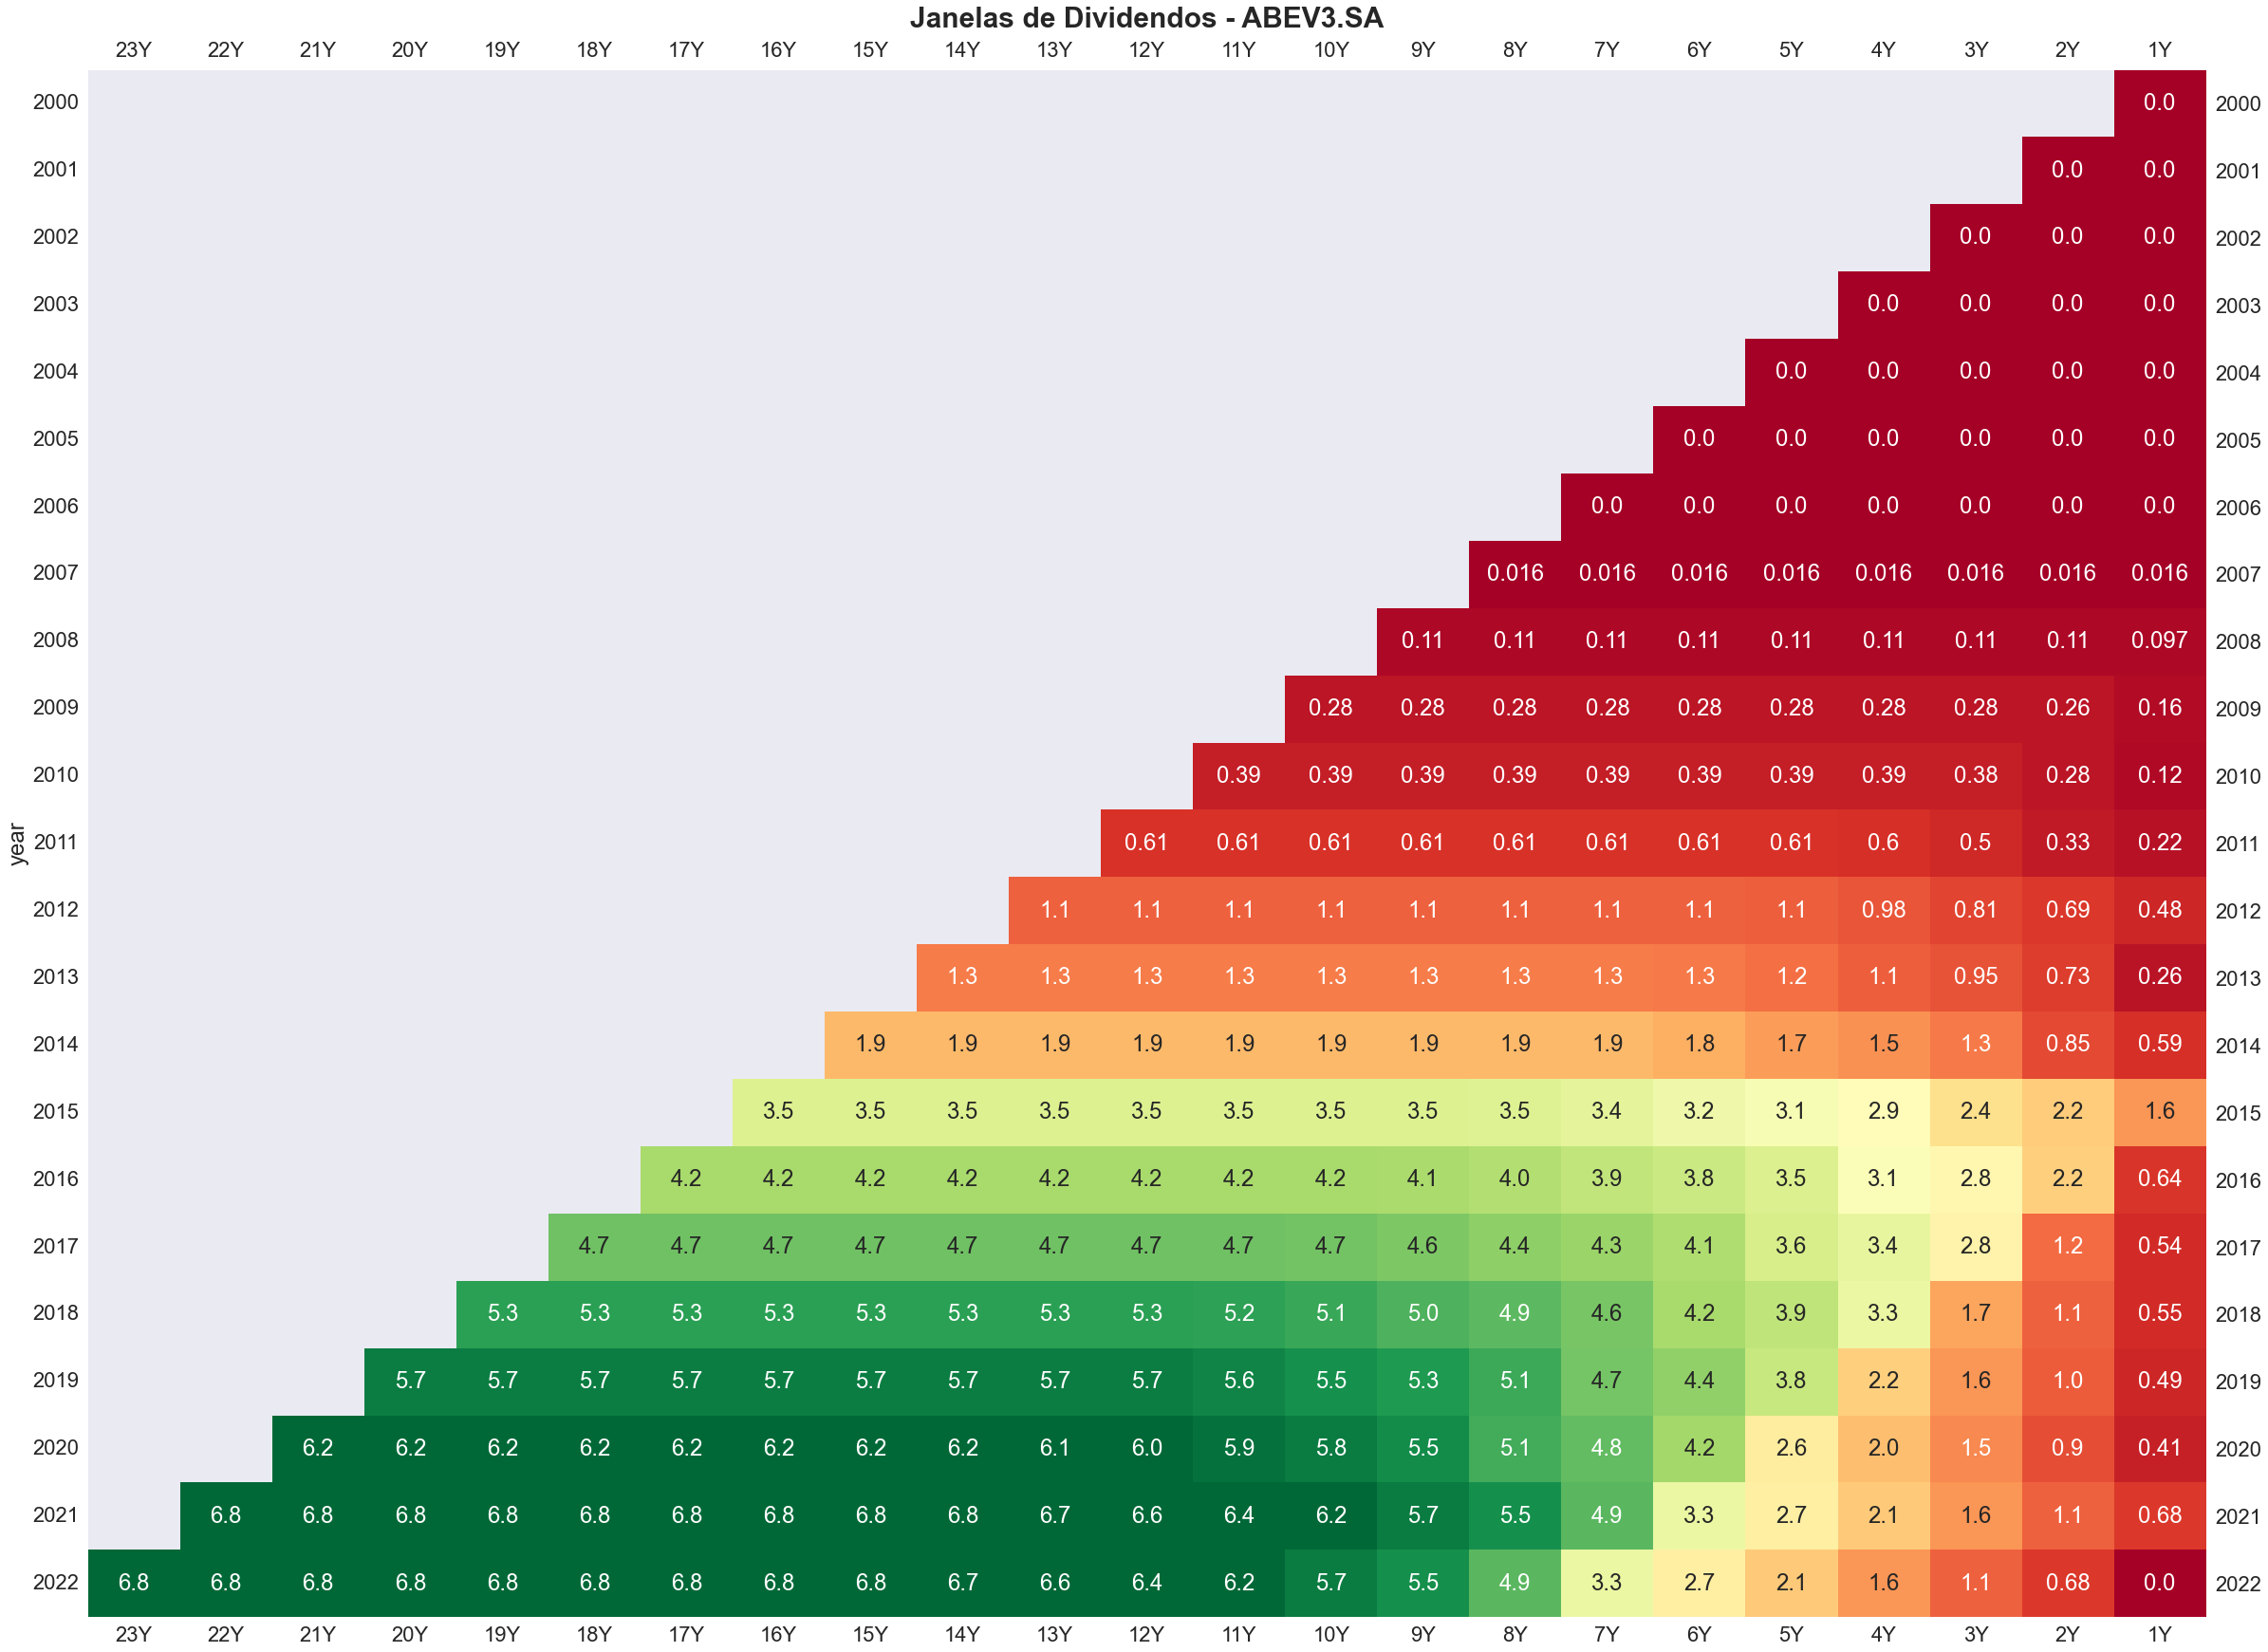

In [171]:
plt.figure(figsize=(40,30))
sns.set(font_scale=2)

ax = sns.heatmap(tab_dividendo_anual, 
                 annot=True, 
                 fmt=".2", 
                 cmap="RdYlGn", 
                 vmin=0, 
                 vmax=6, 
                 center=3, 
                 cbar=False)

ax.set_title(f'Janelas de Dividendos - {filter_asset.upper()}', pad=15, fontdict={'fontsize':30, 'fontweight':600})
ax.tick_params(axis = "y", labelright =True, labelrotation=0)
ax.tick_params(axis = "x", labeltop=True)

# Estudo de caso: Ação aleatória (random)

## Selecionando uma ação aleatória e verificando o resultado quantitativo

In [110]:
#selecionando apenas UMA acao da carteira
RANDON_NUMBER = 1
carteira = random.sample(list(df.columns) , k=RANDON_NUMBER)
carteira

['bbdc4.sa']

In [111]:
carteira[0]

'bbdc4.sa'

In [119]:
df_asset = pfun_pivot_calcular_retorno(str(carteira[0]), df, 1, 'D')

D >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> bbdc4.sa


In [120]:
df_asset

return
date                
2008-01-03 -0.020389
2008-01-04 -0.011751
2008-01-07  0.018519
2008-01-08  0.015311
2008-01-09 -0.008671
...              ...
2022-08-02  0.017211
2022-08-03  0.015846
2022-08-04  0.018384
2022-08-05  0.012035
2022-08-08  0.003243

[3622 rows x 1 columns]

In [121]:
df_media = df_asset['return'].mean()
print('Média dos retornos: {:.2f}%'.format(df_media*100))

Média dos retornos: 0.04%


In [122]:
df_desvio_padrao = df_asset['return'].std()
print('Desvio padrão dos retornos: {:.2f}%'.format(df_desvio_padrao*100))

Desvio padrão dos retornos: 2.41%


### Dado uma porcentagem "x", iremos verificar o comportamento da ação com e sem os seus principais retornos

#### No exemplo abaixo iremos utilizar 10%

In [123]:
NUMBER = 10
PERCENT_NUMBER = NUMBER/100
#verificando os piores retornos
df_asset[df_asset["return"] < -PERCENT_NUMBER]

return
date                
2008-10-22 -0.114960
2009-01-20 -0.114877
2009-05-29 -0.432508
2010-01-20 -0.112443
2010-09-20 -0.121507
2016-04-14 -0.105863
2017-05-18 -0.131127
2020-03-12 -0.134053
2020-03-16 -0.142744
2020-03-18 -0.116567

In [124]:
#verificando a probabilidade da acao cair mais que a porcentagem informada
probabilidade_teorica = norm.cdf(-PERCENT_NUMBER, loc=df_media, scale=df_desvio_padrao)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00150094%


In [125]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 66624 dias
Ou uma vez a cada 264 anos


#### Plotando gráfico do retorno diário da ação

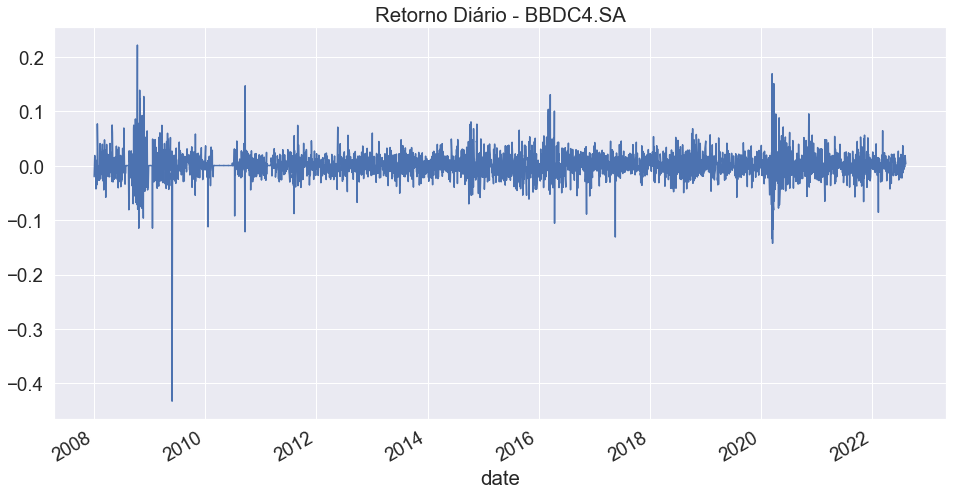

In [126]:
df_asset['return'].plot(title=f"Retorno Diário - {carteira[0].upper()}");

In [127]:
#criando um retorno teorico apenas para exemplo
df_asset['retorno_teorico'] = norm.rvs(size=df_asset['return'].size,  loc=df_media, scale=df_desvio_padrao)

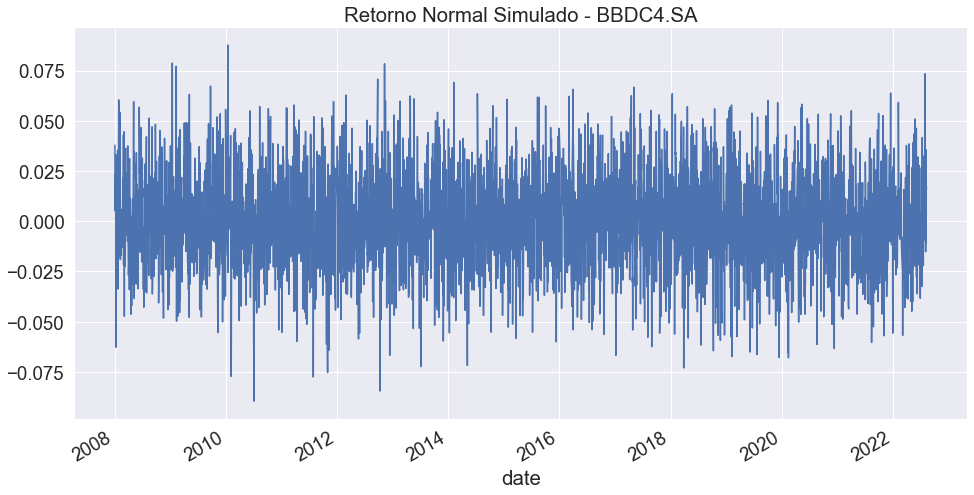

In [128]:
ax = df_asset['retorno_teorico'].plot(title=f"Retorno Normal Simulado - {carteira[0].upper()}");
#ax.set_ylim(-0.2, 0.4)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


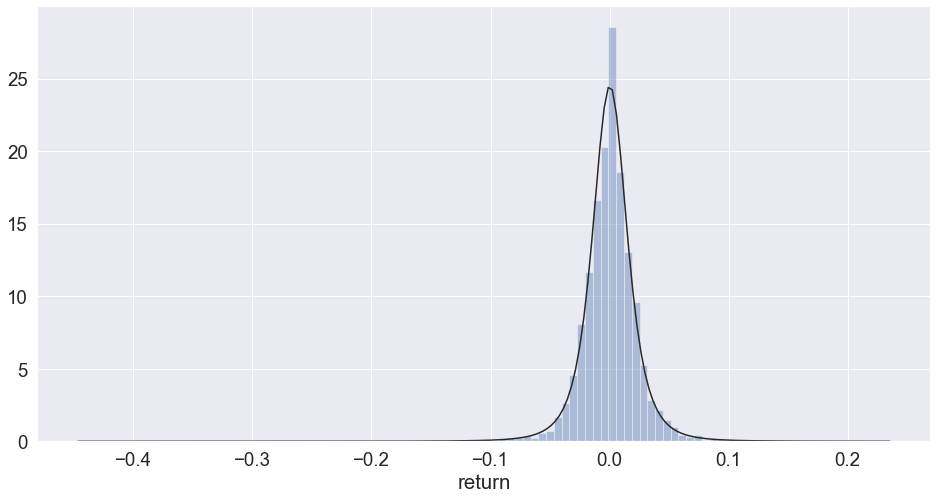

In [129]:
sns.distplot(df_asset['return'], bins=100, kde=False, fit=t);

In [130]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(df_asset['return'])
print('Distribuição T-Student\nGraus de liberdade = {:.2f} \nMédia = {:.4f} \nDesvio padrão = {:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade = 3.34 
Média = 0.0002 
Desvio padrão = 0.01511


In [131]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.13854420%


In [132]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 721 dias
Ou uma vez a cada 2 anos


In [133]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 66624 dias
Ou uma vez a cada 264 anos


In [134]:
frequencia_observada = df_asset['return'].size / df_asset[df_asset["return"] < -PERCENT_NUMBER].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 362 dias


# Estudo de caso: IBOV

In [136]:
df_ibov = yf.download('^BVSP', start='2000-01-01')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [139]:
df_ibov_aux = pfun_calcular_retorno(df_ibov)
df_ibov_aux

price  daily_return  acum_return
Date                                           
2000-01-03   16930.0      0.000000     1.000000
2000-01-04   15851.0     -0.063733     0.936267
2000-01-05   16245.0      0.024856     0.959539
2000-01-06   16107.0     -0.008495     0.951388
2000-01-07   16309.0      0.012541     0.963320
...              ...           ...          ...
2022-08-08  108402.0      0.018127     6.402953
2022-08-09  108651.0      0.002297     6.417661
2022-08-10  110236.0      0.014588     6.511282
2022-08-11  109718.0     -0.004699     6.480685
2022-08-12  112764.0      0.027762     6.660602

[5597 rows x 3 columns]

## Plotando gráfico de preço

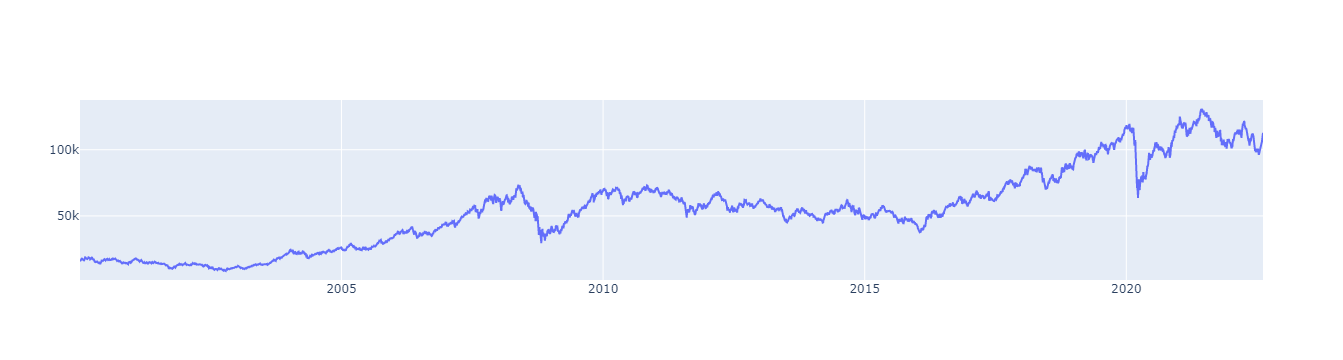

In [141]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ibov_aux.index, y=df_ibov_aux['price']))
fig.show()

In [142]:
#verificando os melhores dias
FILTER_NUMBER = 10
ibov_melhores = df_ibov_aux['daily_return'].sort_values(ascending=False)[:FILTER_NUMBER]
ibov_melhores

Date
2008-10-13    0.146560
2020-03-13    0.139082
2008-10-28    0.134262
2020-03-24    0.096885
2008-09-19    0.095657
2008-11-24    0.094013
2008-10-20    0.083574
2008-12-08    0.083119
2008-09-30    0.076323
2001-01-03    0.076110
Name: daily_return, dtype: float64

In [143]:
#os piores dias
ibov_piores = df_ibov_aux['daily_return'].sort_values(ascending=True)[:FILTER_NUMBER]
ibov_piores

Date
2020-03-12   -0.147797
2020-03-16   -0.139215
2020-03-09   -0.121738
2008-10-15   -0.113931
2020-03-18   -0.103488
2008-10-22   -0.101760
2008-09-29   -0.093634
2017-05-18   -0.087992
2011-08-08   -0.080851
2008-11-12   -0.077505
Name: daily_return, dtype: float64

In [144]:
ibov_sem_melhores_dias = (1 + df_ibov_aux['daily_return'].drop(ibov_melhores.index)).cumprod()
ibov_sem_piores_dias = (1 + df_ibov_aux['daily_return'].drop(ibov_piores.index)).cumprod()

In [146]:
print("Retorno do IBOV desde 1995: {:.2%}".format(df_ibov_aux['acum_return'].iloc[-1] - 1))
print("Retorno do IBOV sem os 10 piores dias: {:.2%}".format(ibov_sem_piores_dias.iloc[-1] - 1))
print("Retorno do IBOV sem os 10 melhores dias: {:.2%}".format(ibov_sem_melhores_dias.iloc[-1] - 1))

Retorno do IBOV desde 1995: 566.06%
Retorno do IBOV sem os 10 piores dias: 1967.21%
Retorno do IBOV sem os 10 melhores dias: 151.57%


## Plotando gráfico do IBOV sem os melhores/piores dias

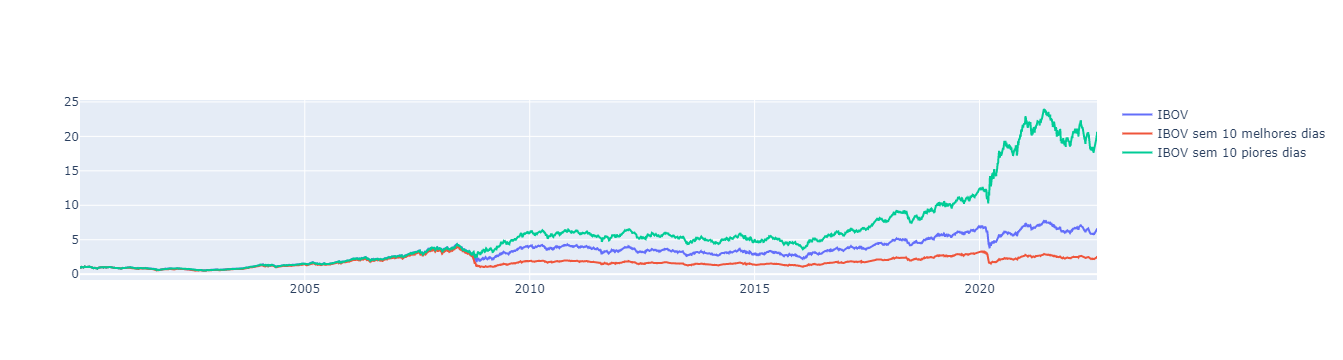

In [149]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_ibov_aux.index, y=df_ibov_aux['acum_return'], name='IBOV'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_melhores_dias.values, name=f'IBOV sem {FILTER_NUMBER} melhores dias'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_piores_dias.values, name=f'IBOV sem {FILTER_NUMBER} piores dias'))

fig.show()